# Handwritten Digit Recognition




**Author: Indudhar RV**  
**Date: June 2025**


#Step 1: Import Required Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


#Step 2: Load the MNIST Dataset



*   The mnist dataset contains 70,000 grayscale images of handwritten digits (0 to 9), each of size 28x28.

   
*   X_train and Y_train: 60,000 training samples.


*   X_test and Y_test: 10,000 testing samples.






In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


#Step 3: Visualize Sample Image

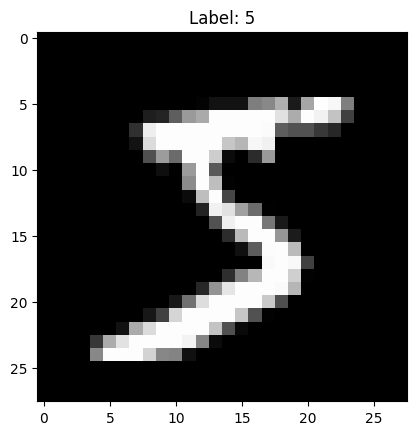

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {Y_train[0]}")
plt.show()


# Step 4: Normalize the Data

Pixel values range from 0 to 255. Normalizing helps the model train faster and better.

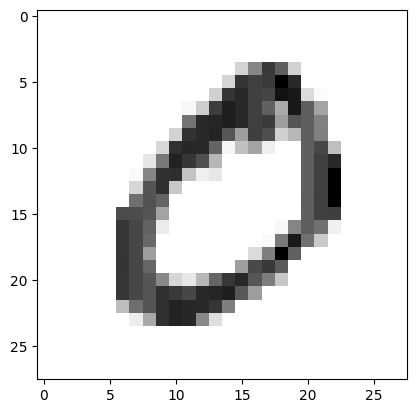

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[1], cmap=plt.cm.binary)

#Step 5: Reshape the Data for CNN Input

In [ ]:
X_trainr = X_train.reshape(-1, 28, 28, 1)
X_testr = X_test.reshape(-1, 28, 28, 1)

print("Reshaped Training Data:", X_trainr.shape)
print("Reshaped Testing Data:", X_testr.shape)


Reshaped Training Data: (60000, 28, 28, 1)
Reshaped Testing Data: (10000, 28, 28, 1)


#Step 6: Build the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])


#Step 7: Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Step 8: Train the Model

In [ ]:
model.fit(X_trainr, Y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8897 - loss: 0.3688 - val_accuracy: 0.9789 - val_loss: 0.0717
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9785 - loss: 0.0671 - val_accuracy: 0.9842 - val_loss: 0.0526
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9868 - val_loss: 0.0460
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9843 - val_loss: 0.0526
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9887 - val_loss: 0.0422


#Step 9: Evaluate the Model on Test Set

we need to test how well it performs on unseen data (X_testr, Y_test).

In [ ]:
test_loss, test_accuracy = model.evaluate(X_testr, Y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0391
Test Loss: 0.03323793411254883
Test Accuracy: 0.9896000027656555


#Step 10: Making Predictions on Test Data


In [ ]:
# Making predictions on the test data
predictions = model.predict(X_testr)

# Check prediction for the first test image
import numpy as np
print("Predicted class:", np.argmax(predictions[0]))
print("Actual class:", Y_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted class: 7
Actual class: 7


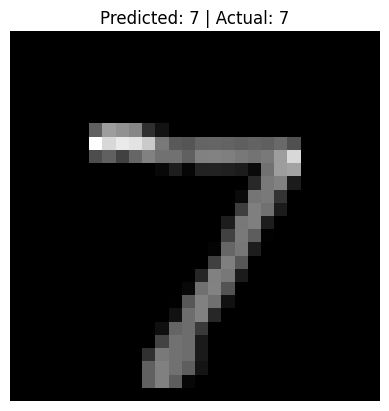

In [ ]:
import matplotlib.pyplot as plt

# Display the actual image for comparison
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])} | Actual: {Y_test[0]}")
plt.axis('off')
plt.show()


#Step 11: Predicting a Custom Handwritten Digit

In [38]:
#uploading the image example 1
from google.colab import files
uploaded = files.upload()


Saving three.png to three.png


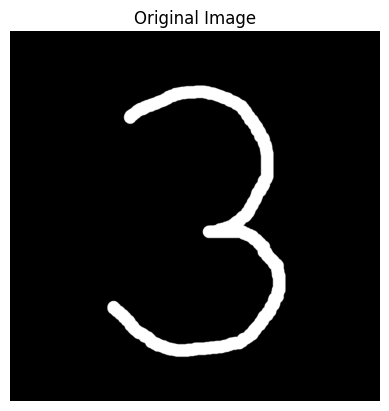

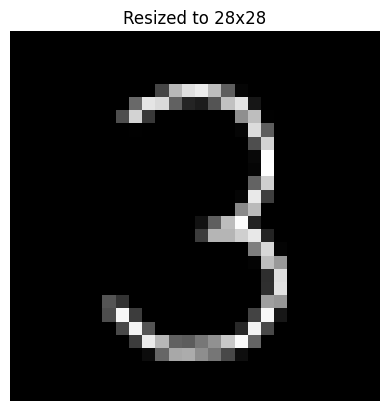

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Digit: 3


In [39]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('three.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Resize to 28x28
resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')
plt.title("Resized to 28x28")
plt.axis('off')
plt.show()

# Normalize and reshape
resized = tf.keras.utils.normalize(resized, axis=1)
new_img = np.array(resized).reshape(-1, 28, 28, 1)

# Predict using the model
prediction = model.predict(new_img)
print("Predicted Digit:", np.argmax(prediction))


In [40]:
#uploading the image example 2
from google.colab import files
uploaded = files.upload()


Saving seven.png to seven.png


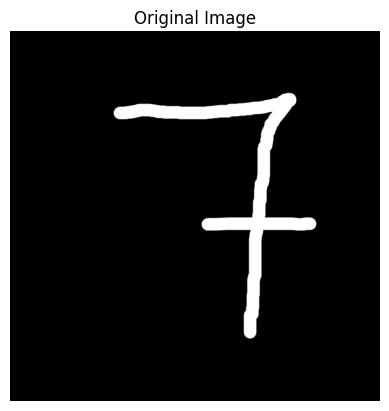

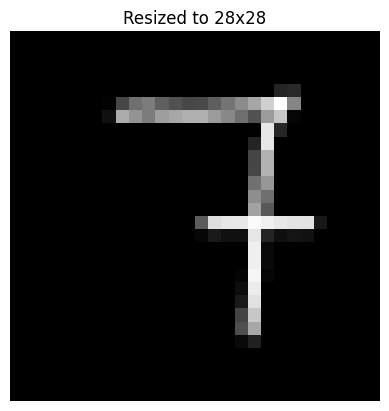

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Digit: 7


In [41]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Resize to 28x28
resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')
plt.title("Resized to 28x28")
plt.axis('off')
plt.show()

# Normalize and reshape
resized = tf.keras.utils.normalize(resized, axis=1)
new_img = np.array(resized).reshape(-1, 28, 28, 1)

# Predict using the model
prediction = model.predict(new_img)
print("Predicted Digit:", np.argmax(prediction))
